In [1]:
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
print('Setup completed')

Setup completed


In [2]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')


In [4]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0',
       'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [5]:
test=test.drop('Fare',axis=1)

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_0', 'Sex_1',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [7]:
X=train.drop('Survived',axis=1)
Y=train['Survived']

In [8]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_0', 'Sex_1',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [9]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,892,3,34.500000,0,0,0,1,0,0,1
1,893,3,47.000000,1,0,1,0,1,0,0
2,894,2,62.000000,0,0,0,1,0,0,1
3,895,3,27.000000,0,0,0,1,1,0,0
4,896,3,22.000000,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.525104,0,0,0,1,1,0,0
414,1306,1,39.000000,0,0,1,0,0,1,0
415,1307,3,38.500000,0,0,0,1,1,0,0
416,1308,3,24.525104,0,0,0,1,1,0,0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 42)

In [12]:
# Gradient Boosting
max_features=[1,2,3,4,5,6,7,8,9,10,15,20,30,40]
max_depth=[1,2,3,4,5,6,7,8,9,10,15,20,30,40]
min_samples_leaf=[1,2,3,4,5,6,7]
random_state=[0,1,5,10,42,120]
min_samples_split=[1,2,3,4,5,6,7,8,9,10,15]

gbc=GradientBoostingClassifier(loss='deviance', learning_rate=0.1,
                                 n_estimators=200, subsample=0.91,
                                 min_samples_split=6, min_samples_leaf=1, 
                                 max_depth=6, init=None, random_state=10,
                                 max_features=9, verbose=0, max_leaf_nodes=None,
                                 warm_start=False)
gbc.fit(x_train, y_train)
preds = gbc.predict(x_test)
acc = accuracy_score(y_test, preds)
print("ACCURACY OF THE MODEL: ", acc)
preds

ACCURACY OF THE MODEL:  0.8194444444444444


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1])

In [13]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_0', 'Sex_1',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [14]:
y_pred_test = gbc.predict(test)
y_scores_test = y_pred_test

test['Survived'] = y_scores_test
test[["PassengerId", "Survived"]].to_csv("gender_submission.csv", index=False)

In [15]:
y_scores_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

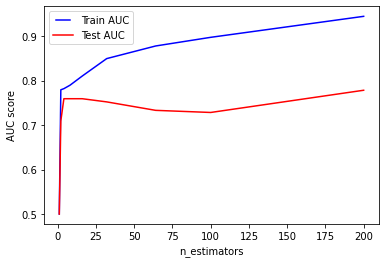

In [ ]:
from sklearn import metrics
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
#(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
# min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0, max_features='auto',
                            random_state=0, max_leaf_nodes=30, min_impurity_decrease=0, min_impurity_split=None)
clf = clf.fit(x_train,y_train)
preds = clf.predict(x_test)
acc = accuracy_score(y_test, preds)
print("ACCURACY OF THE MODEL: ", acc)


ACCURACY OF THE MODEL:  0.8055555555555556


In [22]:
test=test.drop("Survived",axis=1)

In [23]:
# Descion Tree

dcf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dcf = dcf.fit(x_train,y_train)
preds = dcf.predict(x_test)
acc = accuracy_score(y_test, preds)
print("ACCURACY OF THE MODEL: ", acc)


ACCURACY OF THE MODEL:  0.8055555555555556


In [24]:
y_pred_test = dcf.predict(test)
y_scores_test = y_pred_test

test['Survived'] = y_scores_test
test[["PassengerId", "Survived"]].to_csv("gender_submissiondcf.csv", index=False)

In [ ]:
# KMeans

from sklearn.cluster import KMeans
Kmean =KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000 ,n_clusters=2, n_init=15, n_jobs=1, precompute_distances='auto',
 random_state=0, tol=0.00001, verbose=0)
Kmean.fit(X)
preds = Kmean.predict(x_test)
acc = accuracy_score(y_test, preds)
print("ACCURACY OF THE MODEL: ", acc)


ACCURACY OF THE MODEL:  0.5416666666666666


In [ ]:
Kmean =KMeans(algorithm='full', copy_x=True, init='random', max_iter=1000 ,n_clusters=1, n_init=20, n_jobs=1, precompute_distances='auto',
 random_state=0, tol=0.00001, verbose=0)
Kmean.fit(x_test)
preds = Kmean.predict(x_test)
acc = accuracy_score(y_test, preds)
print("ACCURACY OF THE MODEL: ", acc)

ACCURACY OF THE MODEL:  0.5833333333333334


In [ ]:
X['Sex_0'] = X['Sex_0'].apply(lambda x: x*4)


In [ ]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e8daa8c8-3fb0-4a23-87be-52f63dfe9dde' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>